In [1]:
import pandas as pd
import datetime
import random
import pytz

from sqlalchemy import create_engine

from password import hoop_pwd
pwd = hoop_pwd.password

from nba_seer import *

modules imported
functions defined


In [2]:
# create sql conn and load game stats logs ----------------------

conn = create_engine('mysql+pymysql://root:%s@118.190.202.87:3306/nba_stats' % pwd)
game_stats_logs = pd.read_sql_table('game_stats_logs', conn)
game_stats_logs = game_stats_logs[game_stats_logs['GAME_TYPE'] != 'all_star']

print(str(len(game_stats_logs)) + ' player stats loaded.')

184688 player stats loaded.


In [3]:
# load player list ----------------------

all_players = nba_py.player.PlayerList(season='2017-18').info()

print('players list loaded')

players list loaded


In [4]:
def get_score(row):
    player_id = row['PERSON_ID']
    game_id = row['GAME_ID']
    stats = game_stats_logs[(game_stats_logs['PLAYER_ID'] == player_id) & 
                            (game_stats_logs['GAME_ID'] == game_id)].copy()
    #print(stats)
    stats['SCO'] = stats['PTS'] * 1 + stats['AST'] * 1.5 + \
    stats['OREB'] * 1 + stats['DREB'] * 0.7 + \
    stats['STL'] * 2 + stats['BLK'] * 1.8 + stats['TO'] * -1 + \
    stats['FGM'] * 0.4 + (stats['FGA'] - stats['FGM']) * -1 + stats['FG3M'] * 0.5
    return stats['SCO'].max()

In [5]:
game_date = game_stats_logs['GAME_DATE_EST'].drop_duplicates().apply(lambda x: x[:10])

In [6]:
players = pd.DataFrame()
for i in random.sample(list(game_date), 5):
    j = datetime.datetime.strptime(i, "%Y-%m-%d").date()
    games = get_games(j)
    players = players.append(get_players_p(games, game_stats_logs))
    print(str(j) + ' complete!')
else:
    print(len(players), ' players total!')

2014-10-29 complete!
2014-11-30 complete!
2017-05-12 complete!
2015-04-05 complete!
2015-05-21 complete!
747  players total!


In [7]:
players = get_exp_sco(players, game_stats_logs)

players['ACT_SCO'] = players.apply(get_score, axis = 1)
players['SCO_DIFF'] = players['EXP_SCO'] - players['ACT_SCO']
players['SCO_DIFF_PCT'] = players['SCO_DIFF'] / players['ACT_SCO']
print('test data loaded!')

5games days complete!
days rest complete!
ma20 complete!
ma10 complete!
ma5 complete!
min20 complete!
min10 complete!
min5 complete!
min_cov_20 complete!
sco_cov_20 complete!
sco cov less than 0 droped!
all done!
test data loaded!


In [8]:
players = players[(players['ACT_SCO'] != 0) & (players['ACT_SCO'].notnull())]

In [9]:
players.sort_values('SCO_COV_20')

,PERSON_ID,TEAM_ID,Location,GAME_ID,Against_Team_ID,5_g_d,d_rest,MA_20,MA_10,MA_5,MIN_20,MIN_10,MIN_5,MIN_COV_20,SCO_COV_20,EXP_SCO,ACT_SCO,SCO_DIFF,SCO_DIFF_PCT
55,200765,1610612738,HOME,0021400006,1610612751,15,1277,30.50,36.24,NaN,35.98,34.97,NaN,0.088,0.167,32.88,36.6,-3.72,-0.101639
254,203903,1610612747,AWAY,0021400013,1610612756,22,1080,16.27,16.27,16.84,21.33,21.33,22.16,0.364,0.168,9.88,5.2,4.68,0.900000
178,203946,1610612741,AWAY,0021400010,1610612752,6,1095,13.56,13.56,11.72,7.04,7.04,2.15,0.982,0.191,1.95,-2.0,3.95,-1.975000
208,202324,1610612762,HOME,0021400012,1610612745,8,1087,31.33,32.25,30.60,28.52,27.08,23.59,0.238,0.204,23.02,35.4,-12.38,-0.349718
128,202326,1610612758,HOME,0021401152,1610612762,10,923,40.54,44.59,45.03,33.63,35.10,39.64,0.186,0.216,43.54,30.8,12.74,0.413636
45,203909,1610612755,AWAY,0021400005,1610612754,10,1088,21.99,21.99,21.25,22.34,22.34,22.25,0.194,0.221,13.47,4.4,9.07,2.061364
199,200768,1610612761,AWAY,0021400248,1610612747,7,1049,31.36,31.13,34.15,30.84,32.95,32.83,0.226,0.225,28.82,37.8,-8.98,-0.237566
165,201933,1610612746,AWAY,0021401153,1610612747,8,922,32.48,33.05,36.66,34.18,34.05,33.66,0.156,0.231,32.14,26.5,5.64,0.212830
16,201935,1610612745,AWAY,0041400312,1610612744,9,877,35.11,34.40,32.83,36.56,37.01,38.05,0.106,0.245,35.26,63.3,-28.04,-0.442970
4,201566,1610612760,HOME,0021401147,1610612745,9,923,40.13,36.57,28.59,37.46,37.07,37.19,0.137,0.249,36.31,53.3,-16.99,-0.318762


In [10]:
players['SCO_DIFF_PCT'].describe()

count    607.000000
mean      -0.299877
std       11.234642
min     -137.700000
25%       -0.383032
50%       -0.054400
75%        0.665762
max       99.100000
Name: SCO_DIFF_PCT, dtype: float64

In [11]:
players['SCO_DIFF'].describe()

count    607.000000
mean      -0.131301
std        8.780634
min      -29.540000
25%       -5.490000
50%        0.610000
75%        5.970000
max       24.660000
Name: SCO_DIFF, dtype: float64

In [12]:
cov_diff = pd.DataFrame()
#cov_diff['cov'] = abs(players[['MIN_COV_20', 'SCO_COV_20']].mean(axis = 1))
cov_diff['cov'] = abs(players['MIN_COV_20'] * players['SCO_COV_20'])
cov_diff['diff'] = abs(players['SCO_DIFF_PCT'])
cov_diff.sort_values('cov')

,cov,diff
55,0.014696,0.101639
67,0.019344,0.061176
15,0.025915,0.299460
16,0.025970,0.442970
39,0.028078,0.588525
169,0.028300,0.388809
140,0.028688,0.216872
168,0.029376,0.331818
4,0.029450,0.467033
119,0.031610,0.166234


In [13]:
cov_diff[(cov_diff['diff'] < 2) & (cov_diff['cov'] < 1)]

,cov,diff
0,0.109976,0.500915
1,0.119808,0.552536
2,0.049077,0.193382
3,0.061664,0.252604
4,0.101184,0.165894
5,0.141505,0.026606
7,0.188775,1.292857
8,0.311346,0.256604
9,0.323175,0.263441
13,0.122208,0.130409


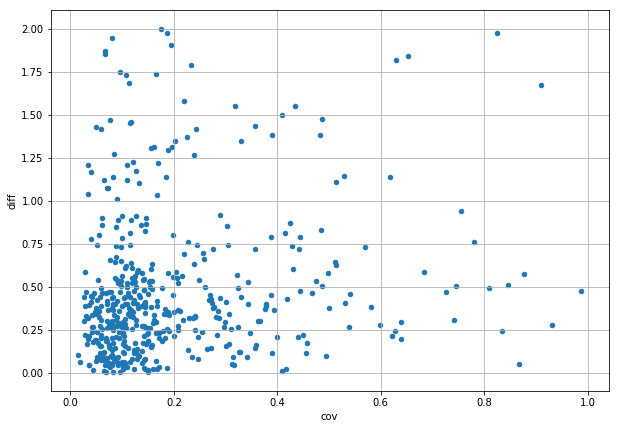

In [14]:
%matplotlib inline
cov_diff[(cov_diff['diff'] < 2) & (cov_diff['cov'] < 1)].plot(x='cov', y='diff', kind='scatter', grid=True, figsize=(10, 7))

In [15]:
cov_diff_1 = cov_diff[(cov_diff['diff'] < 2) & (cov_diff['cov'] < 1)]
cov_diff_1['cov'].corr(cov_diff_1['diff'])

0.17054892326646587

In [16]:
game_logs_test = get_last_n_game_logs(game_stats_logs, 201948, '1300201154', 20)

In [17]:
game_logs_test

,MINS,PTS,AST,OREB,DREB,STL,BLK,TO,FGM,FGA,FG3M
53406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56307,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
57435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58355,1.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
get_score_36(game_logs_test)

(1.2846106679467133, 25.612681226349299)

In [19]:
def last_n_games_days(game_stats_logs, row, n):
    player_id = row['PERSON_ID']
    game_id_o = row['GAME_ID'][3:5] + row['GAME_ID'][:3] + row['GAME_ID'][-5:]
    player_stats_logs = game_stats_logs[game_stats_logs['PLAYER_ID'] == player_id]
    player_5g = player_stats_logs.sort_values('GAME_ID_O')[(player_stats_logs['GAME_ID_O'] < '1600201228') & 
                                                           (player_stats_logs['MINS'].notnull())].tail(n)
    min_d = datetime.datetime.strptime(player_5g['GAME_DATE_EST'].min()[:10], '%Y-%m-%d').date()
    max_d = datetime.datetime.strptime(player_5g['GAME_DATE_EST'].max()[:10], '%Y-%m-%d').date()
    return (max_d - min_d).days

In [20]:
game_stats_logs[(game_stats_logs['PLAYER_ID'] == 201954) & (game_stats_logs['GAME_ID'] == '0021600367')]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,PF,PTS,PLUS_MINUS,LOCATION,AGAINST_TEAM_ID,GAME_TYPE,GAME_DATE_EST,GAME_SEQUENCE,MINS,GAME_ID_O
158207,0021600367,1610612758,SAC,Sacramento,201954,Darren Collison,G,,31:41,7.0,...,2.0,20.0,25.0,HOME,1610612747,regular_season,2016-12-12T00:00:00,7,31.68,1600200367


In [29]:
player_stats_logs = game_stats_logs[game_stats_logs['PLAYER_ID'] == 267634]

In [41]:
ordered_logs = player_stats_logs.sort_values('GAME_ID_O')
len(ordered_logs) == 0

True

In [32]:
player_5g = ordered_logs[(ordered_logs['GAME_ID_O'] < 1700100066) &
                             (ordered_logs['MINS'].notnull())].tail(5)

In [33]:
player_5g

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,PF,PTS,PLUS_MINUS,LOCATION,AGAINST_TEAM_ID,GAME_TYPE,GAME_DATE_EST,GAME_SEQUENCE,MINS,GAME_ID_O


In [34]:
min_d = datetime.datetime.strptime(player_5g['GAME_DATE_EST'].min()[:10], '%Y-%m-%d').date()

TypeError: 'float' object is not subscriptable

In [25]:
last_g_d = datetime.datetime.strptime(last_game['GAME_DATE_EST'].max()[:10], '%Y-%m-%d').date()

In [26]:
ustz = pytz.timezone('America/New_York')
us_time = datetime.datetime.now(ustz)
today = us_time.date()

In [27]:
(today - last_g_d).days

188

In [28]:
def days_rest(game_stats_logs, row):
    player_id = row['PERSON_ID']
    game_id_o = row['GAME_ID'][3:5] + row['GAME_ID'][:3] + row['GAME_ID'][-5:]
    player_stats_logs = game_stats_logs[game_stats_logs['PLAYER_ID'] == player_id]
    ordered_logs = player_stats_logs.sort_values('GAME_ID_O')
    last_game = player_stats_logs[(player_stats_logs['GAME_ID_O'] < game_id_o) & 
                                  (player_stats_logs['MINS'].notnull())].tail(1)
    last_g_d = datetime.datetime.strptime(last_game['GAME_DATE_EST'].max()[:10], '%Y-%m-%d').date()
    ustz = pytz.timezone('America/New_York')
    us_time = datetime.datetime.now(ustz)
    today = us_time.date()
    return (today - last_g_d).days